<a href="https://colab.research.google.com/github/pushpjeetcholkar/machinelearning/blob/main/Project_Dominent_Color_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans

In [100]:
img =cv2.imread("abeer.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(400,500))
print(img.shape)

(500, 400, 3)


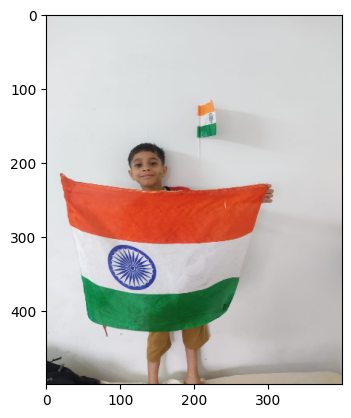

In [101]:
plt.imshow(img)
plt.show()

In [102]:
X = img.reshape((-1,3))
print(X.shape)

(200000, 3)


In [103]:
k=3
model =KMeans(n_clusters=k)
model.fit(X)


KMeans(n_clusters=3)

In [104]:
centroids = model.cluster_centers_
print(centroids)

[[209.03765146 208.91767637 209.48149826]
 [196.6448096   85.75665712  57.612926  ]
 [ 41.93167342  98.6612623   70.56507753]]


In [105]:
colors = np.array(centroids,dtype='uint8')
print(colors)

[[209 208 209]
 [196  85  57]
 [ 41  98  70]]


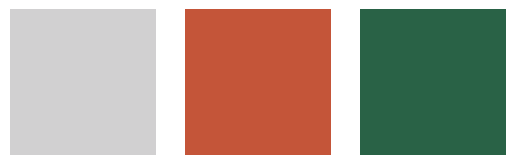

In [106]:
# Color Patch (100,100,3)
i=1
for color in colors:
  plt.subplot(1,k,i)
  plt.axis("off")
  i+=1
  mat = np.zeros((100,100,3),dtype='uint8')
  mat[:,:,:]=color
  plt.imshow(mat)

plt.show()

In [107]:
#Basic Segmentation based upon similar color regions
# Segmentation partitions an image into regions
# having similar visual appearance corresponding to parts of object
print(colors)

[[209 208 209]
 [196  85  57]
 [ 41  98  70]]


In [108]:
np.unique(model.labels_)

array([0, 1, 2], dtype=int32)

In [109]:
model.labels_.shape

(200000,)

In [110]:
newImg = np.zeros((X.shape),dtype='uint8')
print(newImg.shape)


(200000, 3)


In [111]:
for i in range(newImg.shape[0]):
  newImg[i]=colors[model.labels_[i]]

newImg=newImg.reshape(img.shape)
print(newImg.shape)

(500, 400, 3)


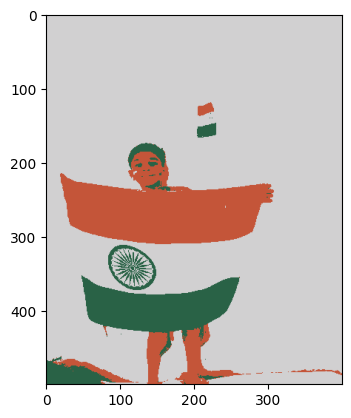

In [112]:
plt.imshow(newImg)
plt.show()